<class 'numpy.int32'>


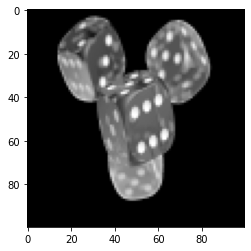

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


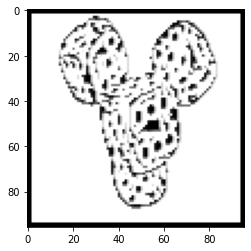

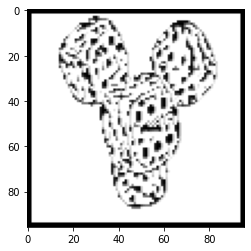

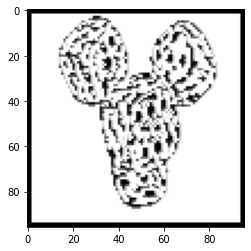

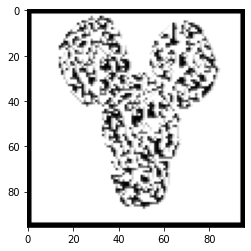

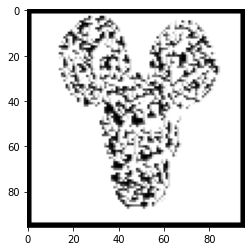

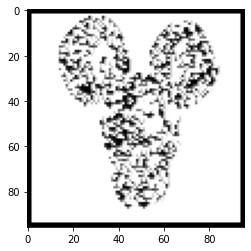

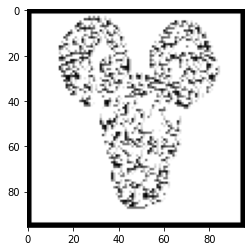

LBP Program is finished


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    return img[x][y] - center

def calculatedeciamlvalue( val_ar ):
    power_val = [1, 2, 4, 8, 16, 32, 64, 128, 256]
    val = 0
    n = len(val_ar)
    for i in range(n):
        val += val_ar[n - i - 1] * power_val[i]
    

    if val > 255:
        val = 255

    return val

def lbp_calculated_pixel(img,x, y):
    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x+1, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y-1))       # bottom
    val_ar.append(get_pixel(img, center, x, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x-1, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y+1))       # top
    
    #print("unsorted " , val_ar)
   
    for i in range(1, len(val_ar)):
  
        key = val_ar[i]
        j = i-1
        while j >=0 and abs(key) >= abs(val_ar[j]) :
                if abs(key) == abs(val_ar[j]) and key > (val_ar[j]):
                    break
                val_ar[j+1] = val_ar[j]
                j -= 1
        val_ar[j+1] = key 
        
    #print("sorted " , val_ar)

    binary_ar = []
    for i in range(0, len(val_ar)):
      if val_ar[i] < 0:
          binary_ar.append(0)
      else:
          binary_ar.append(1)
            
            
    #if x==5 and y==5 :
     #  print(val_ar)
      #  print(binary_ar)

    return binary_ar


     

def lmebppattern(img, x, y):
 
    binarymatrix = np.zeros((8,9), np.int32) 
    binarymatrix[:,0] = lbp_calculated_pixel(img,x, y) 
    binarymatrix[:,1] = lbp_calculated_pixel(img, x, y+1)     
    binarymatrix[:,2] = lbp_calculated_pixel(img, x+1, y+1)   
    binarymatrix[:,3] = lbp_calculated_pixel(img, x+1, y)     
    binarymatrix[:,4] = lbp_calculated_pixel(img, x+1, y-1)      
    binarymatrix[:,5] = lbp_calculated_pixel(img, x, y-1)    
    binarymatrix[:,6] = lbp_calculated_pixel(img, x-1, y-1)       
    binarymatrix[:,7] = lbp_calculated_pixel(img, x-1, y)    
    binarymatrix[:,8] = lbp_calculated_pixel(img, x-1, y+1)     

    decimalmatrix = np.zeros(8, np.int32) 
    for i in range(0, len(binarymatrix)):    
        decimalmatrix[i] = calculatedeciamlvalue(binarymatrix[i])
        
    #if x==4 and y==4 :
     #   print(img[x][y])
      #  print("decimalmatrix" , decimalmatrix)
       # print("binarymatrix", binarymatrix)
    
    return decimalmatrix


    
def main():
    #image_file = '/content/lenna.jpg'
    #img_bgr = cv2.imread(image_file, 0)
    
    #img_gray = np.array([[2,5,3,9,1],
     #                      [6,7,6,1,5],
      #                     [2,3,6,8,2],
       #                    [3,8,4,2,9],
        #                   [1,2,3,2,1]])
    img_gray = cv2.imread('/content/dice.png', 0)
    img_gray = cv2.resize(img_gray , (100,100) ,interpolation = cv2.INTER_AREA)
    img_gray = img_gray.astype(np.int32)
    height, width = img_gray.shape
    height = height -4
    width = width - 4
    print(type(img_gray[0][0]))
    plt.imshow(img_gray, cmap="gray")
    plt.show()

    ##img_gray  = np.pad(img_gray, pad_width=[(2, ), (2, )], mode='constant',
               #constant_values=0)
    
    print(img_gray)
    
    img_lbp1 = np.zeros((height, width), np.int32)
    img_lbp2 = np.zeros((height, width), np.int32)
    img_lbp3 = np.zeros((height, width), np.int32)
    img_lbp4 = np.zeros((height, width), np.int32)
    img_lbp5 = np.zeros((height, width), np.int32)
    img_lbp6 = np.zeros((height, width), np.int32)
    img_lbp7 = np.zeros((height, width), np.int32)
    img_lbp8 = np.zeros((height, width), np.int32)
    for i in range(2, height-2):
        for j in range(2, width-2):
             v = lmebppattern(img_gray, i, j)
             img_lbp1[i,j]=v[0]
             img_lbp2[i,j]=v[1]
             img_lbp3[i,j]=v[2]
             img_lbp4[i,j]=v[3]
             img_lbp5[i,j]=v[4]
             img_lbp6[i,j]=v[5]
             img_lbp7[i,j]=v[6]
             img_lbp8[i,j]=v[7]
    
                             
    plt.imshow(img_lbp1,cmap="gray")
    plt.show()
    plt.imshow(img_lbp2,cmap="gray")
    plt.show()
    plt.imshow(img_lbp3,cmap="gray")
    plt.show()
    plt.imshow(img_lbp4,cmap="gray")
    plt.show()
    plt.imshow(img_lbp5,cmap="gray")
    plt.show()
    plt.imshow(img_lbp6,cmap="gray")
    plt.show()
    plt.imshow(img_lbp7,cmap="gray")
    plt.show()


if __name__ == '__main__':
    main()